### Import your librares

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load your dataset

In [2]:
data=pd.read_csv('seattle_weather.csv')

In [3]:
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Handle missing data in PRCP and RAIN columns

In [4]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [5]:
data['PRCP'].fillna(np.mean(data['PRCP']),inplace=True)

In [6]:
import statistics
data['RAIN'].fillna(statistics.mode(data['RAIN']),inplace=True)

In [7]:
data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


- Visualize the outliers

<Axes: >

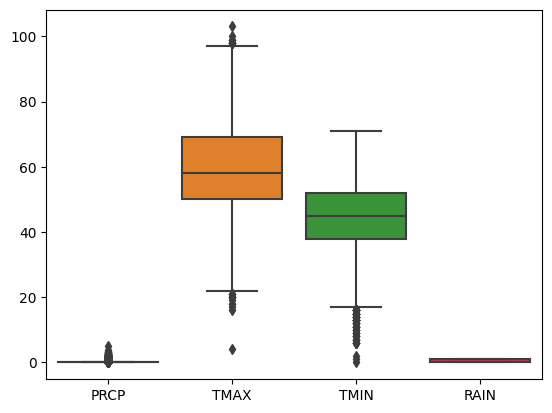

In [8]:
sns.boxplot(data=data)

PRCP

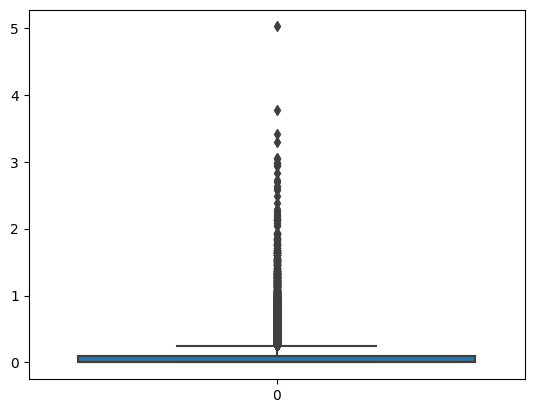

In [9]:
sns.boxplot(data = data['PRCP']);

In [10]:
data['PRCP'].var()

0.057129329674218

In [11]:
Q1 = np.percentile(data['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1             
print('lower outliers ', Q1 - 1.5*(IQR))
print('higher outliers', Q3 + 1.5*(IQR))


lower outliers  -0.15000000000000002
higher outliers 0.25


In [12]:
data= data.drop(data[(data['PRCP'] > 0.25) | (data['PRCP'] < -0.15)].index)
data['PRCP'].var()

0.0035053326619171174

<Axes: xlabel='PRCP'>

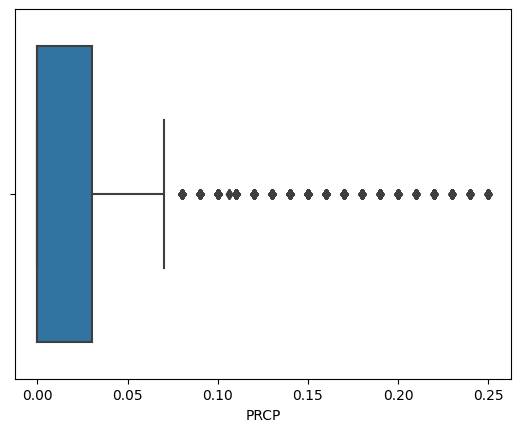

In [13]:
sns.boxplot(x= data['PRCP'])

TMAX

171.83233013705564

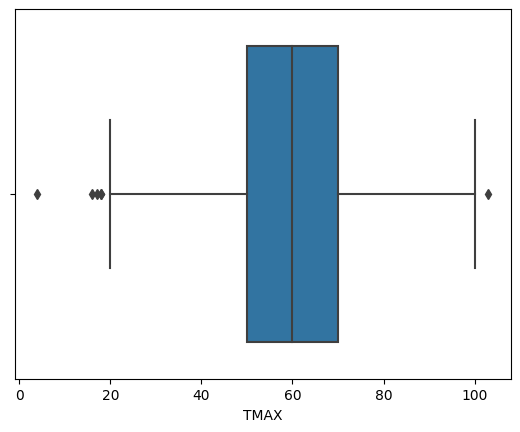

In [14]:
sns.boxplot(x= data['TMAX']);
data['TMAX'].var()

In [15]:
Q1 = np.percentile(data['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1            
print('lower outliers ', Q1 - 1.5*(IQR))
print('higher outliers', Q3 + 1.5*(IQR))


lower outliers  20.0
higher outliers 100.0


In [16]:
data= data.drop(data[(data['TMAX'] > 100) | (data['TMAX'] < 20)].index)
data['TMAX'].var()

171.30866601950316

<Axes: xlabel='TMAX'>

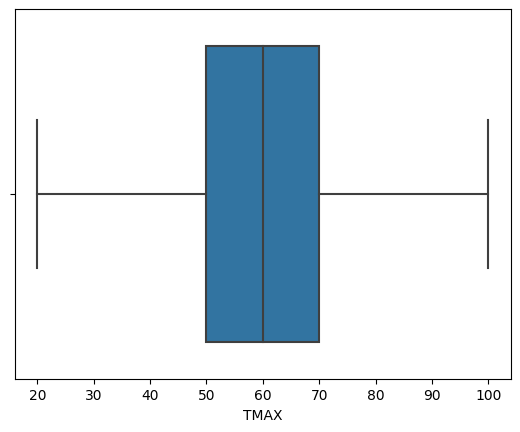

In [17]:
sns.boxplot(x= data['TMAX'])

TMIN

83.77171157070468

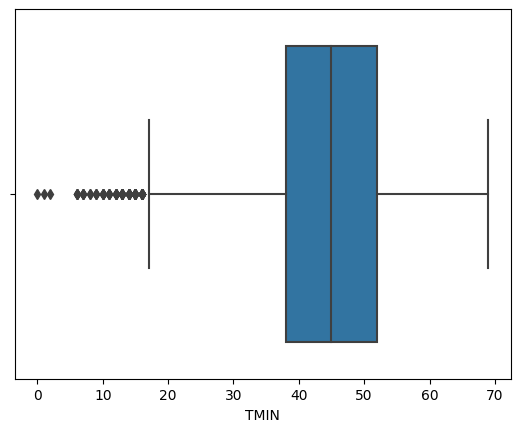

In [18]:
sns.boxplot(x = data['TMIN'])

data['TMIN'].var()

array([[<Axes: title={'center': 'PRCP'}>,
        <Axes: title={'center': 'TMAX'}>],
       [<Axes: title={'center': 'TMIN'}>, <Axes: >]], dtype=object)

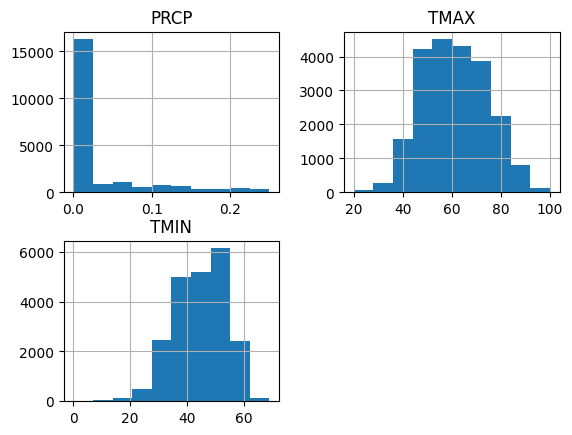

In [19]:
data.hist()

In [20]:
Q1 = np.percentile(data['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1          
print('lower outliers ', Q1 - 1.5*(IQR))
print('higher outliers', Q3 + 1.5*(IQR))

lower outliers  17.0
higher outliers 73.0


In [21]:
data= data.drop(data[(data['TMIN'] > 73) | (data['TMIN'] < 17)].index)
data['TMIN'].var()

80.00529863798968

<Axes: xlabel='TMIN'>

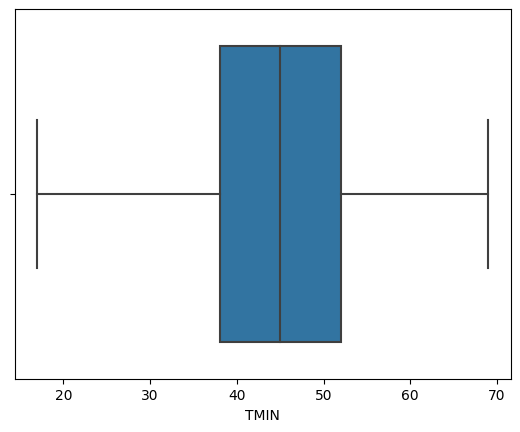

In [22]:
sns.boxplot(x= data['TMIN'])

<Axes: >

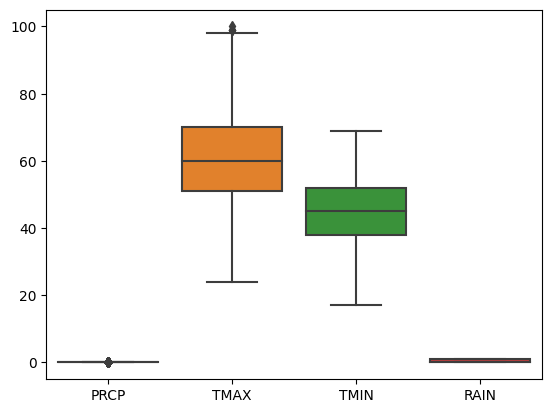

In [23]:
sns.boxplot(data=data)

array([[<Axes: title={'center': 'PRCP'}>,
        <Axes: title={'center': 'TMAX'}>],
       [<Axes: title={'center': 'TMIN'}>, <Axes: >]], dtype=object)

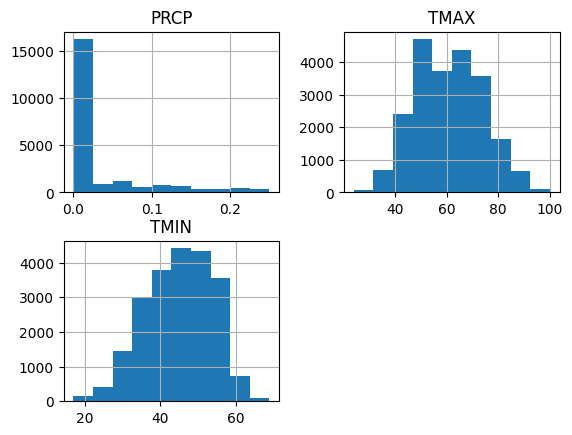

In [24]:
data.hist()